<a href="https://colab.research.google.com/github/Jonc29/DATA-ANALYSIS/blob/main/NYC_SCHOOL_PERFORMANCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend.

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Task of the project
1. Finding schools with the best math scores

2. Identifying the top 10 performing schools

3. Locating the NYC borough with the largest standard deviation in SAT performance

In [15]:
# Re-run this cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Read in the data
schools = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/schools.csv")

# Preview the data
schools.head()

# Start coding here...
# Add as many cells as you like...

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [16]:
# to have a brief look into the data
print(schools.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB
None


In [17]:
print(schools.isna().sum())

school_name         0
borough             0
building_code       0
average_math        0
average_reading     0
average_writing     0
percent_tested     20
dtype: int64


In [18]:
schools.nunique()
# This will show that there is only 5 places within borou

,0
school_name,375
borough,5
building_code,233
average_math,173
average_reading,165
average_writing,162
percent_tested,275


# Task 1
### Finding schools with the best math scores

In [19]:
# To subset the math score column with its other informative columns
math_score =schools[['school_name', 'average_math']]
math_score

,school_name,average_math
0,"New Explorations into Science, Technology and ...",657
1,Essex Street Academy,395
2,Lower Manhattan Arts Academy,418
3,High School for Dual Language and Asian Studies,613
4,Henry Street School for International Studies,410
...,...,...
370,"Queens High School for Information, Research, ...",372
371,Rockaway Park High School for Environmental Su...,357
372,Channel View School for Research,427
373,Rockaway Collegiate High School,399


In [20]:
# To show the schools that meet the condition (average score of 80%)
best_math_schools = math_score[math_score['average_math'] >= 640].sort_values(by = 'average_math', ascending = False)
best_math_schools

,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683
280,Brooklyn Technical High School,682
333,Townsend Harris High School,680
174,High School of American Studies at Lehman College,669
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641


In [21]:
# To know the number of schools that meet up to 80% score in math
num_avg_score_80 = schools['average_math'] >= 640
schools_with_80percent_score = best_math_schools.set_index("school_name")
print(f" These are the schools that meet up 80% Score in the math SATs : \n {schools_with_80percent_score} \n")
print(f" Which are {num_avg_score_80.sum()}  in Total ")

 These are the schools that meet up 80% Score in the math SATs : 
                                                     average_math
school_name                                                     
Stuyvesant High School                                       754
Bronx High School of Science                                 714
Staten Island Technical High School                          711
Queens High School for the Sciences at York Col...           701
High School for Mathematics, Science, and Engin...           683
Brooklyn Technical High School                               682
Townsend Harris High School                                  680
High School of American Studies at Lehman College            669
New Explorations into Science, Technology and M...           657
Eleanor Roosevelt High School                                641 

 Which are 10  in Total 


/tmp/ipython-input-2459228330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=best_math_schools['school_name'], x=best_math_schools['average_math'], palette="coolwarm")


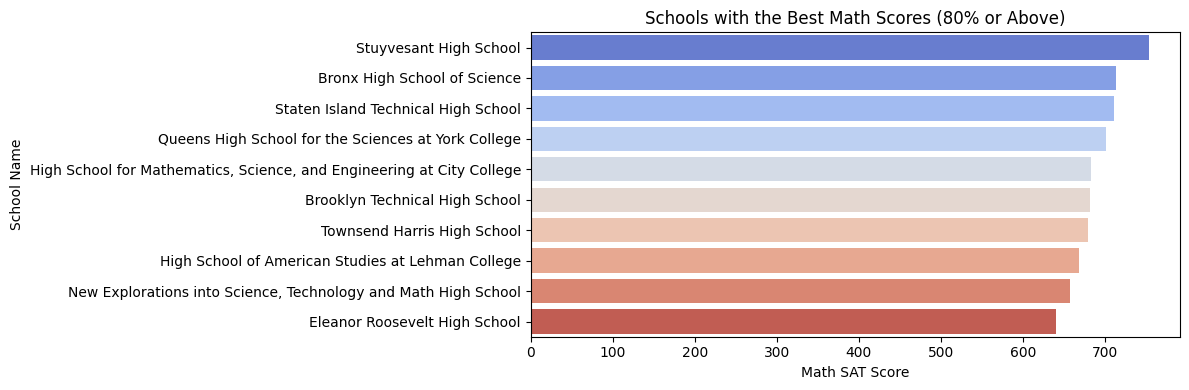

In [22]:
# 1st Plot: Schools with the best math scores (80% and above)
plt.figure(figsize=(12, 4))
sns.barplot(y=best_math_schools['school_name'], x=best_math_schools['average_math'], palette="coolwarm")
plt.title('Schools with the Best Math Scores (80% or Above)')
plt.xlabel('Math SAT Score')
plt.ylabel('School Name')
plt.tight_layout()
plt.show()

# Task 1

## summary of insight gotten

#### In Finding schools with the best math scores of at least 80%, considering the maximum possible score is 800
1. There's 10 schools out of the 375 schools that got up to 80% in the SATs exams
2. The school with highest score is **Stuyvesant High School** with 754 score over 800
4. This Analysis shows that it's only 2.67% that got up to 80% in the SATs math Exam

## Recommendation
### Judging with the Dataset Provided;
- I would recommend that The **New York City NYC SAT** should reduce the Average math pass score
- Just like the Jamb reduced the cut-off mark from **200/400 to 140/400**. Smiles

# Task 2
## Identifying the top 10 performing schools

In [23]:
schools

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7
...,...,...,...,...,...,...,...
370,"Queens High School for Information, Research, ...",Queens,Q465,372,362,352,44.6
371,Rockaway Park High School for Environmental Su...,Queens,Q410,357,381,376,38.5
372,Channel View School for Research,Queens,Q410,427,430,423,76.6
373,Rockaway Collegiate High School,Queens,Q410,399,403,405,46.5


In [24]:
# To add a new column that will hold the total score for the 3 subject scores
# I also used Pivot_table() pandas attribute to subset the columns I want to get their sum score
total_SAT_scores = pd.pivot_table(schools, values = ["average_math", "average_reading", "average_writing"], index = ["school_name", "borough"], aggfunc='sum')
total_SAT_scores['sum_total'] = total_SAT_scores.sum(axis=1)
total_SAT_scores

,,average_math,average_reading,average_writing,sum_total
school_name,borough,,,,
A. Philip Randolph Campus High School,Manhattan,459,453,447,1359
ACORN Community High School,Brooklyn,379,395,385,1159
Abraham Lincoln High School,Brooklyn,441,422,422,1285
Academy for Careers in Television and Film,Queens,444,458,444,1346
Academy for College Preparation and Career Exploration (College Board),Brooklyn,386,397,393,1176
...,...,...,...,...,...
World Journalism Preparatory (College Board),Queens,484,491,487,1462
York Early College Academy,Queens,496,481,473,1450
Young Women's Leadership School,Manhattan,478,465,472,1415


In [25]:
# To Bring out the Top 10 school
top_10_school = total_SAT_scores["sum_total"].nlargest(10)
top_10_school

,,sum_total
school_name,borough,
Stuyvesant High School,Manhattan,2144
Bronx High School of Science,Bronx,2041
Staten Island Technical High School,Staten Island,2041
High School of American Studies at Lehman College,Bronx,2013
Townsend Harris High School,Queens,1981
Queens High School for the Sciences at York College,Queens,1947
Bard High School Early College,Manhattan,1914
Brooklyn Technical High School,Brooklyn,1896
Eleanor Roosevelt High School,Manhattan,1889


/tmp/ipython-input-3155874096.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_school.index.get_level_values('school_name'), x=top_10_school.values,palette="coolwarm")


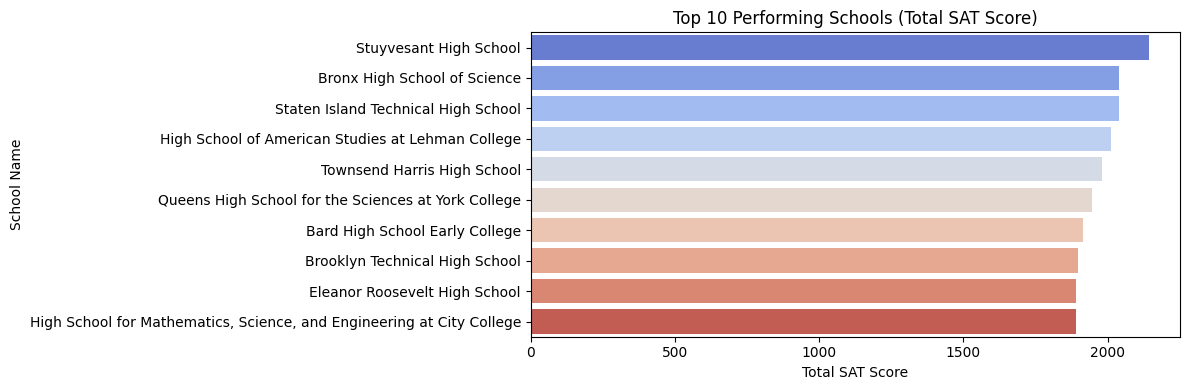

In [26]:
# 2nd Plot: Top 10 performing schools based on total SAT score
plt.figure(figsize=(12, 4))
sns.barplot(y=top_10_school.index.get_level_values('school_name'), x=top_10_school.values,palette="coolwarm")
plt.title('Top 10 Performing Schools (Total SAT Score)')
plt.xlabel('Total SAT Score')
plt.ylabel('School Name')
plt.tight_layout()
plt.savefig('my_plot.png')
plt.show()

# Task 2

## summary of insight gotten

- It is seen that the top 10 performing 🎭 school are the same school that meet up with 80% of the 800 max. score

# Task 3
### Locating the NYC borough with the largest standard deviation in SAT performance

In [27]:
# To Find the total number of unique schools in the dataset
total_SAT_scores

,,average_math,average_reading,average_writing,sum_total
school_name,borough,,,,
A. Philip Randolph Campus High School,Manhattan,459,453,447,1359
ACORN Community High School,Brooklyn,379,395,385,1159
Abraham Lincoln High School,Brooklyn,441,422,422,1285
Academy for Careers in Television and Film,Queens,444,458,444,1346
Academy for College Preparation and Career Exploration (College Board),Brooklyn,386,397,393,1176
...,...,...,...,...,...
World Journalism Preparatory (College Board),Queens,484,491,487,1462
York Early College Academy,Queens,496,481,473,1450
Young Women's Leadership School,Manhattan,478,465,472,1415


In [28]:
# To Find the total number of unique schools in the dataset
num_of_schools = schools.index.nunique()
num_of_schools

375

In [29]:
# To Calculate the mean (average) of SAT scores for each subject and the total score
# This provides an average SAT score across all schools for Math, Reading, Writing, and their combined sum
total_SAT_scores.mean()

,0
average_math,432.944000
average_reading,424.504000
average_writing,418.458667
sum_total,1275.906667


In [30]:
# To Specifically, calculate the mean (average) of the 'sum_total' column, which gives the average total SAT score per school
total_SAT_scores["sum_total"].mean()

np.float64(1275.9066666666668)

In [31]:
# Compute the standard deviation of SAT scores for each subject and the total score
# This shows how much the SAT scores deviate from the mean score for each subject across schools
total_SAT_scores.std()

,0
average_math,71.952373
average_reading,61.881069
average_writing,64.548599
sum_total,194.906283


In [32]:
# To  Specifically, calculate the standard deviation for the 'sum_total' column,
# which tells us how spread out the total SAT scores are
total_SAT_scores["sum_total"].std()

194.90628306967335

In [33]:
# This helps in understanding the performance variability between different boroughs
borough_stat = total_SAT_scores.groupby("borough")["sum_total"].agg(["count", "mean", "std"]).round(2)
borough_stat

,count,mean,std
borough,,,
Bronx,98,1202.72,150.39
Brooklyn,109,1230.26,154.87
Manhattan,89,1340.13,230.29
Queens,69,1345.48,195.25
Staten Island,10,1439.00,222.30


In [34]:
# Group the SAT scores by borough, and compute the standard deviation of total SAT scores for each borough
borough_std = total_SAT_scores.groupby("borough")["sum_total"].agg("std").round(2)
borough_std

,sum_total
borough,
Bronx,150.39
Brooklyn,154.87
Manhattan,230.29
Queens,195.25
Staten Island,222.30


In [35]:
# 8. Identify the borough with the highest standard deviation, indicating where SAT scores vary the most
borough_highest_std = borough_std.idxmax()
borough_std.sort_values(ascending=False)

,sum_total
borough,
Manhattan,230.29
Staten Island,222.30
Queens,195.25
Brooklyn,154.87
Bronx,150.39


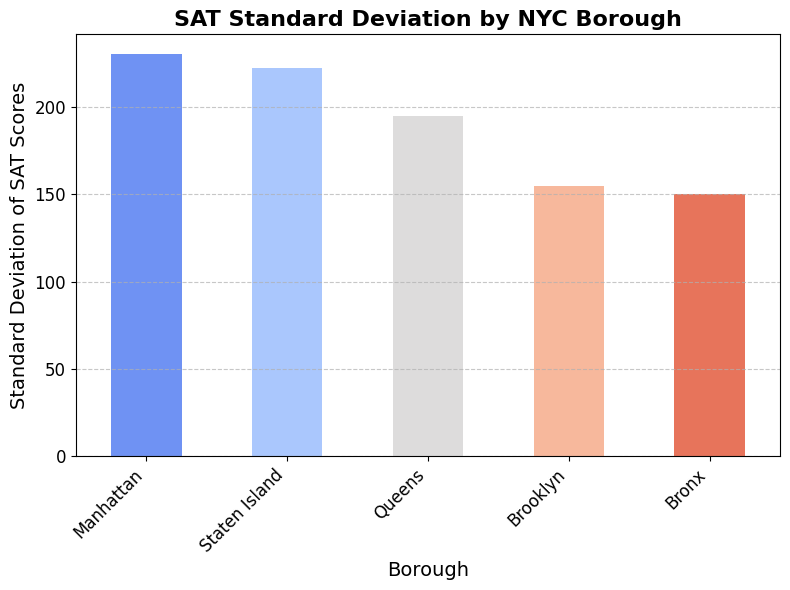

In [36]:
# 3rd Plot: Standard deviation of SAT scores by borough
plt.figure(figsize=(8, 6))
borough_std.sort_values(ascending=False).plot(kind='bar', color=sns.color_palette("coolwarm", len(borough_std)))
plt.title('SAT Standard Deviation by NYC Borough', fontsize=16, fontweight='bold')
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Standard Deviation of SAT Scores', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Task 3
## Summary of Insight Gained
In identifying the NYC borough with the largest standard deviation in SAT performance;
1. Manhattan stands out with the highest variation in total SAT scores.
2. The standard deviation of the total SAT scores for Manhattan is 230.29, which is significantly higher than the next highest,
3. Staten Island, with a standard deviation of 222.30.
4. The borough with the lowest standard deviation is the Bronx at 150.39.

# How i approached the project
1. Finding schools with the best math scores

2. Identifying the top 10 performing schools

3. Locating the NYC borough with the largest standard deviation in SAT performance

Finding schools with the best math scores
Subset the data to find the schools with math scores of at least 80%, considering the maximum possible score is 800 and save this as a pandas DataFrame called best_math_schools.

Identifying the top 10 performing schools
Find the 10 best performing schools based on the total score across the three SAT sections.


Creating a column for average scores
Sorting and limiting the data


Locating the NYC borough with the largest standard deviation in SAT performance
Find out the number of schools, average SAT, and standard deviation of SAT for the NYC borough with the largest standard deviation, rounded to two decimal places.


Grouping the data by borough
Filtering for the largest standard deviation
Renaming columns